<a href="https://colab.research.google.com/github/raffaloffredo/do_excel_a_analise_de_dados/blob/main/Previs%C3%A3o_com_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

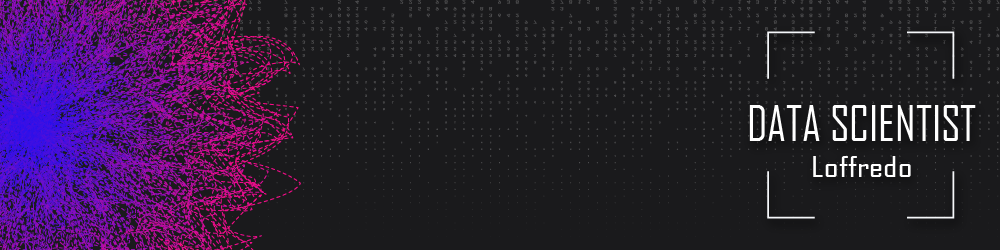

<div>
  <a href = "https://github.com/raffaloffredo/data_science_portfolio"><img src="https://img.shields.io/badge/GitHub-100000?style=for-the-badge&logo=github&logoColor=white" target="_blank"></a>
  <a href="https://www.linkedin.com/in/raffaela-loffredo/?locale=en_US" target="_blank"><img src="https://img.shields.io/badge/-LinkedIn-%230077B5?style=for-the-badge&logo=linkedin&logoColor=white" target="_blank"></a>
  <a href="https://sites.google.com/view/loffredo/" target="_blank"><img src="	https://img.shields.io/badge/website-000000?style=for-the-badge&logo=About.me&logoColor=white" target="_blank"></a>
  <a href="https://instagram.com/loffredo.ds" target="_blank"><img src="https://img.shields.io/badge/-Instagram-%23E4405F?style=for-the-badge&logo=instagram&logoColor=white" target="_blank"></a>
  <a href="https://medium.com/@loffredo.ds" target="_blank"><img src="https://img.shields.io/badge/Medium-12100E?style=for-the-badge&logo=medium&logoColor=white"></a>
</div>

# Sobre o projeto

Esse documento faz parte do projeto "Do Excel à Análise de Dados" que tem por objetivo analisar ações de empresa da Bolsa do Brasil - B3 - e da bolsa dos Estados Unidos para mostrar minhas habilidades com o uso de planilhas, criação de fórmulas para se chegar no resultado obtido, desenvolvimento de análises de dados com criação de gráficos e previsão de séries temporais.

Acesse o projeto inteiro [aqui](https://github.com/raffaloffredo/do_excel_a_analise_de_dados).

# Previsão com Prophet

In [ ]:
# importar as bibliotecas necessárias
import pandas as pd               # manipulação de dados
import yfinance as yf             # extração de dados financeiros
import matplotlib.pyplot as plt   # criação de gráficos
from prophet import Prophet       # séries temporais

import warnings                   # notificações
warnings.filterwarnings('ignore') # configurar notificações para serem ignoradas

# configurações adicionais
## estilo de gráficos
plt.style.use('seaborn-v0_8-deep')

# configurar a saída para mostrar todas as linhas e colunas
pd.options.display.max_columns  = None

# configurar saída de figuras em formato 'svg' (melhor qualidade)
%config InlineBackend.figure_format = 'svg'

O Prophet é uma ferramenta desenvolvida pelo Facebook para fazer previsões em séries temporais, que são basicamente dados coletados ao longo do tempo, como os preços das ações. É famoso por ser fácil de usar e por funcionar bem mesmo com poucos dados ou com dados que possuem padrões irregulares, o que é comum no mercado de ações.

Vamos usar dados de ações da empresa Johnson & Johnson como exemplo.

Aqui, usamos um comando para baixar os dados. É como se estivéssemos pedindo à internet para nos dar os preços das ações da Johnson & Johnson desde 2020 até o final de 2023. Fácil, né?

In [ ]:
# criar variável dados e baixar informações dos últimos 4 anos da Johnson & Johnson
dados = yf.download('JNJ', start='2020-01-01', end='2023-12-31', progress=False)

# resetar o índice
dados = dados.reset_index()

# visualizar alterações
dados.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,145.869995,146.020004,145.080002,145.970001,130.099152,5777000
1,2020-01-03,143.500000,145.369995,143.000000,144.279999,128.592865,5752400
2,2020-01-06,144.000000,144.199997,142.850006,144.100006,128.432419,7731300
3,2020-01-07,144.009995,145.449997,141.380005,144.979996,129.216766,7382900
4,2020-01-08,144.869995,145.979996,143.699997,144.960007,129.198914,6605800


Agora, dividimos nossos dados em duas partes: uma para treinar nosso 'adivinho' digital, que é até julho de 2023, e outra para testar nossas previsões, que é o restante do ano.

In [ ]:
# dividir os dados em um conjunto de treino e outro de testes
dados_treino = dados[dados['Date'] < '2023-07-31']
dados_teste = dados[dados['Date'] >= '2023-07-31']

In [ ]:
# preparar os dados para o Prophet
dados_prophet_treino = dados_treino[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# visualizar alterações
dados_prophet_treino.head()

,ds,y
0,2020-01-02,145.970001
1,2020-01-03,144.279999
2,2020-01-06,144.100006
3,2020-01-07,144.979996
4,2020-01-08,144.960007


O próximo passo é preparar os dados para o nosso adivinho, o Prophet. É como se estivéssemos arrumando os dados para que ele entenda o que estamos perguntando.

Depois, criamos o modelo do Prophet. Aqui, estamos dizendo ao Prophet para considerar padrões semanais e anuais nos dados, mas não diários. E também adicionamos feriados dos EUA, já que eles podem influenciar o preço das ações.

In [ ]:
# criar o modelo
modelo = Prophet(weekly_seasonality=True,
                yearly_seasonality=True,
                daily_seasonality=False)

# inserir feriados dos EUA
modelo.add_country_holidays(country_name='US')

# treinar o modelo
modelo.fit(dados_prophet_treino)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpwc_svmds/cb3giyeu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwc_svmds/awaycw8t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37301', 'data', 'file=/tmp/tmpwc_svmds/cb3giyeu.json', 'init=/tmp/tmpwc_svmds/awaycw8t.json', 'output', 'file=/tmp/tmpwc_svmds/prophet_modeltw6gmtt3/prophet_model-20240330144146.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:41:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:41:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Agora, a parte mágica! Pedimos ao Prophet para prever o futuro, até o final de 2023. E então, plotamos um gráfico para ver como nossa previsão se compara com os dados reais.

In [ ]:
# definir período de previsão (até final de 2023)
futuro = modelo.make_future_dataframe(periods=150)

# fazer previsões
previsao = modelo.predict(futuro)

Neste gráfico, vocês verão três linhas. A azul mostra o preço real das ações até julho de 2023, a verde mostra os preços reais após essa data, e a laranja mostra o que o Prophet previu. A linha vermelha pontilhada marca onde começam as previsões.

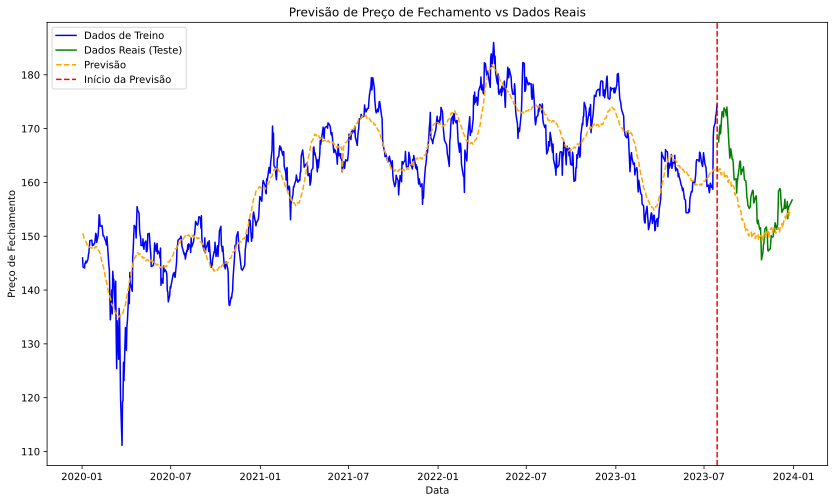

In [ ]:
# plotar gráfico com dados de treino, teste e previsões
# criar figure
plt.figure(figsize=(14, 8))

# dados de treino em azul
plt.plot(dados_treino['Date'], dados_treino['Close'], label='Dados de Treino', color='blue')

# dados de teste (valores reais) em verde
plt.plot(dados_teste['Date'], dados_teste['Close'], label='Dados Reais (Teste)', color='green')

# dados previstos pelo algoritmo Prophet
plt.plot(previsao['ds'], previsao['yhat'], label='Previsão', color='orange', linestyle='--')

# criar linha vertical para marcar onde começa a previsão
plt.axvline(dados_treino['Date'].max(), color='red', linestyle='--', label='Início da Previsão')

# nomear eixos
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')

# configurar título
plt.title('Previsão de Preço de Fechamento vs Dados Reais')

# inserir legendas
plt.legend()

# visualizar gráfico
plt.show()